<a href="https://colab.research.google.com/github/AalaaAyman24/CNN-based-model/blob/main/GradModel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
X_path = '/content/drive/My Drive/X_test.pkl'
y_path = '/content/drive/My Drive//y_test.pkl'


In [3]:
!pip install scikit-learn tensorflow matplotlib seaborn

In [4]:
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [5]:
import pickle

with open(X_path, 'rb') as f:
    raw_X = pickle.load(f)

with open(y_path, 'rb') as f:
    raw_y = pickle.load(f)

print(f"Total samples loaded: {len(raw_X)}")


Total samples loaded: 75849


In [6]:

max_mz = 1
num_bins = 200

bin_size = max_mz / num_bins

processed_X = []

for spectrum in raw_X:
    mz_values = spectrum[0]
    intensity_values = spectrum[1]

    binned = np.zeros(num_bins)
    for mz, intensity in zip(mz_values, intensity_values):
        if mz < max_mz:
            idx = int(mz // bin_size)
            binned[idx] += intensity

    processed_X.append(binned)

X = np.array(processed_X).reshape(-1, num_bins, 1)
print(f'Shape of X after binning: {X.shape}')



Shape of X after binning: (75849, 200, 1)


In [8]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(raw_y)
y_categorical = to_categorical(y_encoded)

print(f'Number of classes: {y_categorical.shape[1]}')


Number of classes: 1653


In [9]:
model = Sequential([
    Input(shape=(num_bins, 1)),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 196, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 94, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 43, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1653)           │       213,237 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609,013 (2.32 MB)

 Trainable params: 609,013 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X, y_categorical, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.0223 - loss: 6.3630 - val_accuracy: 0.0080 - val_loss: 10.4353
Epoch 2/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0445 - loss: 5.7310 - val_accuracy: 0.0112 - val_loss: 11.5883
Epoch 3/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0667 - loss: 5.3383 - val_accuracy: 0.0180 - val_loss: 12.5871
Epoch 4/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0802 - loss: 5.1265 - val_accuracy: 0.0170 - val_loss: 14.4190
Epoch 5/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.0915 - loss: 4.9425 - val_accuracy: 0.0162 - val_loss: 14.7590
Epoch 6/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.0972 - loss: 4.8300 - val_accuracy: 0.0237 - val_loss: 15.2383
Epoch 7/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.1065 - loss: 4.7125 - val_accuracy: 0.0206 - val_loss: 16.7473
Epoch 8/30
1897/1897 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1150 -

Model Accuracy: 20.39%


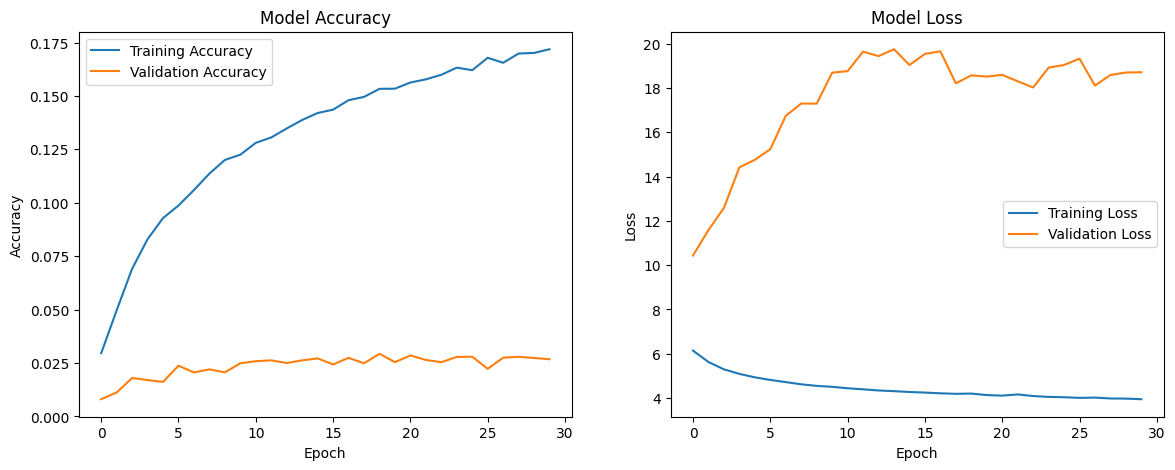

In [12]:
loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
predictions = model.predict(X)

predicted_classes = np.argmax(predictions, axis=1)

print("Predicted Classes for first 10 samples:")
print(predicted_classes[:10])


2371/2371 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Predicted Classes for first 10 samples:
[1398  470  768  489 1574  668 1198 1358  768  299]


In [14]:
# Convert true labels to class numbers
true_classes = np.argmax(y_categorical, axis=1)

# Manual accuracy
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes) * 100
print(f"Manual Accuracy: {accuracy:.2f}%")


Manual Accuracy: 20.39%
